In [9]:
# model training
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, precision_score, f1_score
data = pd.read_csv("/content/creditcard.csv")

df = pd.DataFrame(data)

# print(df.head())

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

scaler = StandardScaler()

X = df.drop("Class", axis=1)
Y = df["Class"]

X_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scaled,Y, test_size=0.25, stratify=Y)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)





Recall: 0.8135593220338984
Precision: 0.9504950495049505
F1 Score: 0.8767123287671232


ROC-AUC Score: 0.9645428846062709


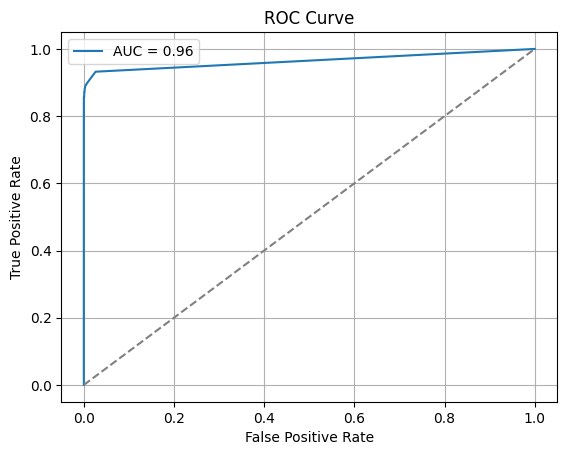

In [10]:
# ROC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (fraud)
y_proba = rfc.predict_proba(x_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


Average Precision Score (PR AUC): 0.8638822098109906


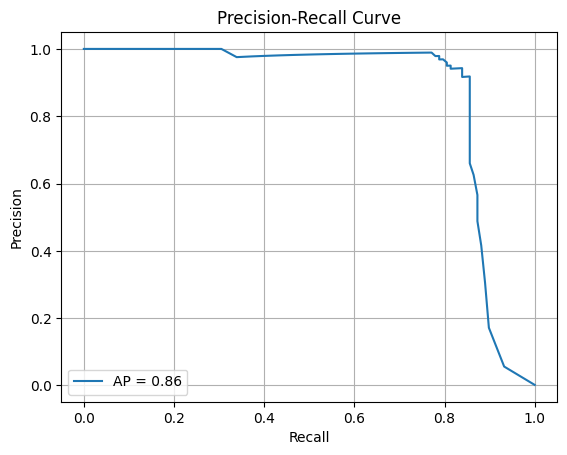

In [11]:
# PRC
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
ap_score = average_precision_score(y_test, y_proba)
print("Average Precision Score (PR AUC):", ap_score)

# Plot PR curve
plt.plot(recall_vals, precision_vals, label=f"AP = {ap_score:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()



In [12]:
#cross validation scores:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X_scaled, Y, cv=5, scoring='roc_auc')
print("Cross-Validated ROC-AUC Scores:", scores)
print("Mean ROC-AUC:", scores.mean())


Cross-Validated ROC-AUC Scores: [0.56279371 0.92155863 0.90628294 0.96499698 0.92438027]
Mean ROC-AUC: 0.8560025063534893


In [1]:
#Hyper tuning the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, classification_report

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],                 # Number of trees
    'max_depth': [8, 12, None],                 # Tree depth
    'min_samples_split': [2, 5],                # Minimum split size
    'min_samples_leaf': [1, 2],                 # Minimum leaf node size
    'class_weight': ['balanced'],              # Handle imbalance
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',           # Optimizing for F1 Score
    cv=5,                   # 5-fold CV
    verbose=2,
    n_jobs=-1               # Use all available cores
)

# Fit on training data
grid_search.fit(x_train, y_train)

# Best model from search
best_model = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)
print("🏆 Best F1 Score from CV:", grid_search.best_score_)

# Predict on test data
y_pred = best_model.predict(x_test)
y_proba = best_model.predict_proba(x_test)[:, 1]

# Final evaluation
print("📊 Final Evaluation on Test Set")
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


NameError: name 'x_train' is not defined